In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#Hyperparameters
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8
#embedding_dim = embedding layer dimension = 64
#trunc_type = post = Create a new string object from the given object. If encoding or
#errors is specified, then the object must expose a data buffer
#that will be decoded using the given encoding and error handler.
#Otherwise, returns the result of object.__str__() (if defined)
# padding_type=post = Create a new string object from the given object. If encoding or
#errors is specified, then the object must expose a data buffer
#that will be decoded using the given encoding and error handler

In [ ]:
articles = []
labels = []

with open("/content/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))
#There are 2,225 news articles in the data, we split them into
# training set and validation set, according to the parameter we set earlier, 80% for training, 20% for validation.

2225
2225


In [ ]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'also': 6,
 'mr': 3,
 'new': 8,
 'one': 10,
 'people': 7,
 'said': 2,
 'us': 9,
 'would': 4,
 'year': 5}

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[10])

[2432, 1, 225, 4994, 22, 641, 586, 225, 4994, 1, 1, 1663, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2308, 1, 1144, 1694, 1, 1721, 4995, 1, 1, 1, 1, 1, 4737, 1, 1, 122, 4514, 1, 2, 2875, 1505, 352, 4738, 1, 52, 341, 1, 352, 2174, 3962, 41, 22, 3794, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4739, 1, 365, 22, 1, 787, 2368, 1, 4301, 138, 10, 1, 3664, 682, 3531, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4994, 1, 599, 1, 1694, 1021, 1, 4996, 807, 1864, 117, 1, 1, 1, 2975, 22, 1, 99, 278, 1, 1607, 4997, 542, 492, 1, 1444, 4740, 779, 1320, 1, 1861, 10, 33, 641, 319, 1, 62, 478, 564, 301, 1506, 22, 479, 1, 1, 1666, 1, 797, 1, 3067, 1, 1365, 6, 1, 2432, 564, 22, 2972, 4734, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1506, 1343, 374, 20, 63, 883, 1096, 4302, 247]


In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

425
200
192
200
186
200


In [ ]:
print(train_padded[10])

[2432    1  225 4994   22  641  586  225 4994    1    1 1663    1    1
 2432   22  564    1    1  140  278    1  140  278  796  822  662 2308
    1 1144 1694    1 1721 4995    1    1    1    1    1 4737    1    1
  122 4514    1    2 2875 1505  352 4738    1   52  341    1  352 2174
 3962   41   22 3794    1    1    1    1  542    1    1    1  835  631
 2367  347 4739    1  365   22    1  787 2368    1 4301  138   10    1
 3664  682 3531    1   22    1  414  822  662    1   90   13  633    1
  225 4994    1  599    1 1694 1021    1 4996  807 1864  117    1    1
    1 2975   22    1   99  278    1 1607 4997  542  492    1 1444 4740
  779 1320    1 1861   10   33  641  319    1   62  478  564  301 1506
   22  479    1    1 1666    1  797    1 3067    1 1365    6    1 2432
  564   22 2972 4734    1    1    1    1    1  850   39 1825  675  297
   26  979    1  882   22  361   22   13  301 1506 1343  374   20   63
  883 1096 4302  247    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

In [ ]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(set(labels))

{'sport', 'entertainment', 'tech', 'politics', 'business'}


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
56/56 - 15s - loss: 1.5681 - accuracy: 0.3208 - val_loss: 1.2607 - val_accuracy: 0.3843 - 15s/epoch - 270ms/step
Epoch 2/10
56/56 - 10s - loss: 0.8836 - accuracy: 0.6500 - val_loss: 0.6187 - val_accuracy: 0.8584 - 10s/epoch - 187ms/step
Epoch 3/10
56/56 - 10s - loss: 0.3741 - accuracy: 0.8899 - val_loss: 0.4634 - val_accuracy: 0.8584 - 10s/epoch - 187ms/step
Epoch 4/10
56/56 - 11s - loss: 0.1902 - accuracy: 0.9399 - val_loss: 0.3021 - val_accuracy: 0.9169 - 11s/epoch - 188ms/step
Epoch 5/10
56/56 - 11s - loss: 0.0906 - accuracy: 0.9730 - val_loss: 0.3549 - val_accuracy: 0.8764 - 11s/epoch - 188ms/step
Epoch 6/10
56/56 - 10s - loss: 0.0431 - accuracy: 0.9904 - val_loss: 0.3163 - val_accuracy: 0.9101 - 10s/epoch - 187ms/step
Epoch 7/10
56/56 - 10s - loss: 0.0120 - accuracy: 0.9972 - val_loss: 0.3346 - val_accuracy: 0.9213 - 10s/epoch - 186ms/step
Epoch 8/10
56/56 - 11s - loss: 0.0114 - accuracy: 0.9944 - val_loss: 0.3252 - val_accuracy: 0.9011 - 11s/epoch - 188ms/step
Epoch 9/

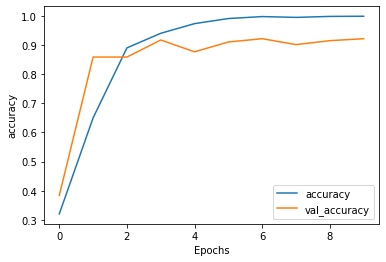

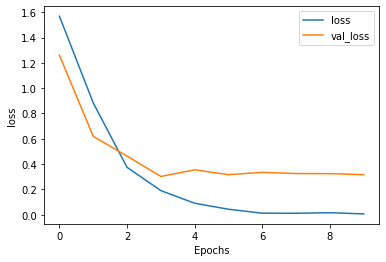

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]


In [ ]:
seq = tokenizer.texts_to_sequences(txt)


In [ ]:
seq

[[1216,
  1,
  2976,
  1,
  410,
  1281,
  45,
  596,
  190,
  1178,
  1281,
  1005,
  35,
  2383,
  831,
  1550,
  1743,
  1925,
  2884,
  1637,
  1,
  528,
  2085,
  3155,
  1]]

In [ ]:
padded = pad_sequences(seq, maxlen=max_length)


In [ ]:
padded

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
pred = model.predict(padded)


In [ ]:
pred

array([[4.5974863e-05, 2.2227062e-04, 2.6839814e-04, 5.6934849e-05,
        6.5825722e-04, 9.9874818e-01]], dtype=float32)

In [ ]:
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']


In [ ]:
labels

['sport', 'bussiness', 'politics', 'tech', 'entertainment']

In [ ]:
print(pred)

[[4.5974863e-05 2.2227062e-04 2.6839814e-04 5.6934849e-05 6.5825722e-04
  9.9874818e-01]]


In [ ]:
l=(np.argmax(pred))
print(l)

5
